In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150
train_data_dir = 'train'
train_samples = 120
epochs = 20
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 196 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'nqpsk': 0, 'qpsk': 1}


In [9]:
imgs, labels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


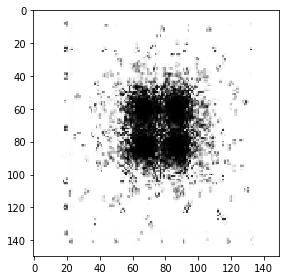

1.0


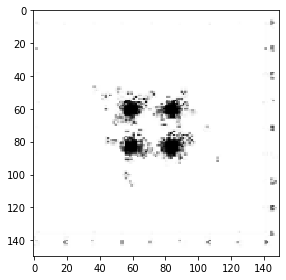

1.0


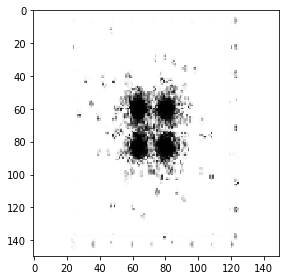

1.0


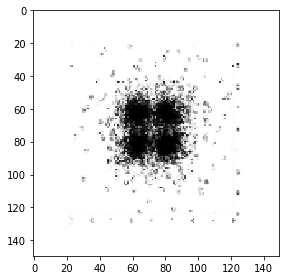

1.0


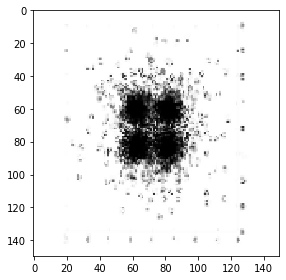

1.0


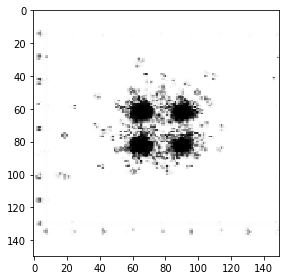

1.0


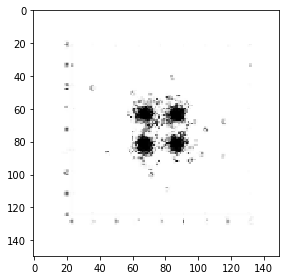

1.0


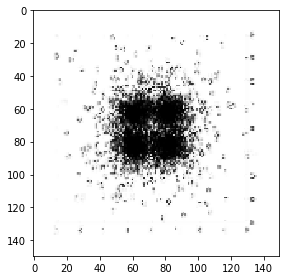

1.0


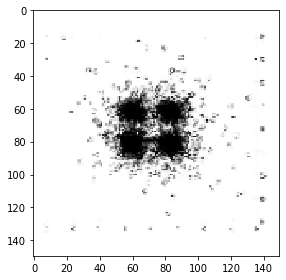

1.0


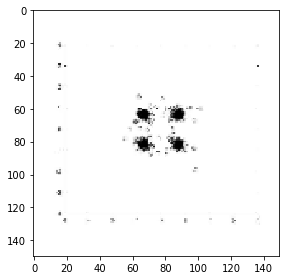

1.0


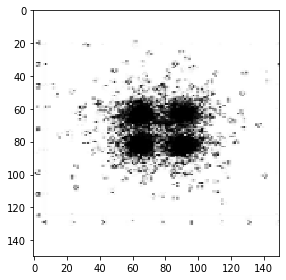

0.0


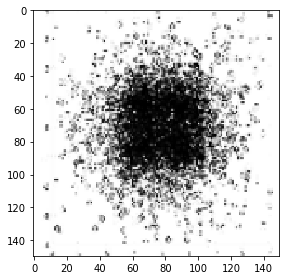

1.0


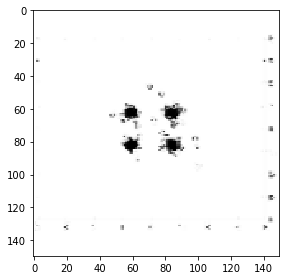

1.0


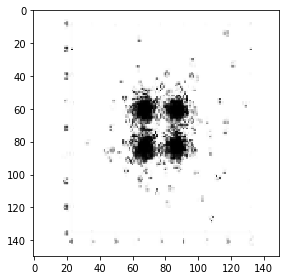

1.0


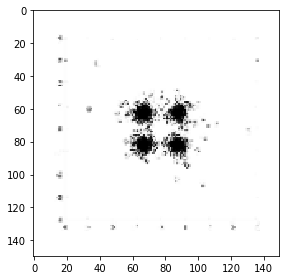

1.0


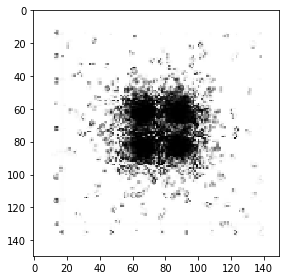

1.0


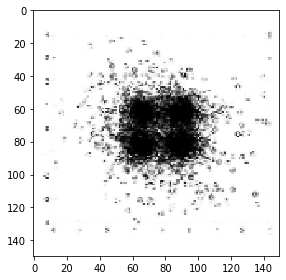

1.0


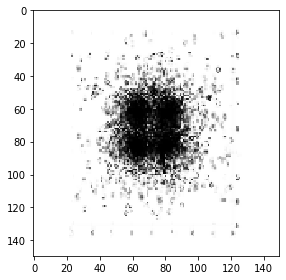

1.0


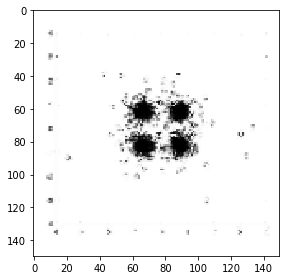

1.0


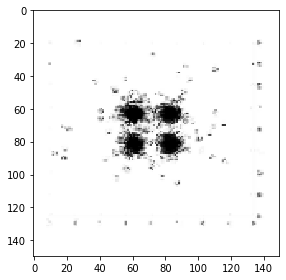

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs)

Epoch 1/20
6/6 [==============================] - 4s 623ms/step - loss: 0.5580 - accuracy: 0.7759
Epoch 2/20
6/6 [==============================] - 4s 593ms/step - loss: 0.5116 - accuracy: 0.8190
Epoch 3/20
6/6 [==============================] - 4s 596ms/step - loss: 0.3834 - accuracy: 0.8667
Epoch 4/20
6/6 [==============================] - 5s 896ms/step - loss: 0.4117 - accuracy: 0.8417
Epoch 5/20
6/6 [==============================] - 4s 693ms/step - loss: 0.4034 - accuracy: 0.8190
Epoch 6/20
6/6 [==============================] - 3s 552ms/step - loss: 0.3235 - accuracy: 0.8621
Epoch 7/20
6/6 [==============================] - 3s 565ms/step - loss: 0.3698 - accuracy: 0.8017
Epoch 8/20
6/6 [==============================] - 3s 570ms/step - loss: 0.3406 - accuracy: 0.8500
Epoch 9/20
6/6 [==============================] - 3s 576ms/step - loss: 0.2529 - accuracy: 0.8667
Epoch 10/20
6/6 [==============================] - 3s 567ms/step - loss: 0.3029 - accuracy: 0.8276
Epoch 11/20
6/6 [==

In [13]:
predict_dir_path='predict/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1.jpg', '2.jpg', '3.jpg', '33.jpg', '34.jpg', '41.jpg']


In [14]:
from keras.preprocessing import image
qpsk_counter = 0 
nqpsk_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'nqpsk')
        nqpsk_counter += 1
    else:
        print(file + ": " + 'qpsk')
        qpsk_counter += 1
print("Total qpsk :",qpsk_counter)
print("Total npqsk :",nqpsk_counter)

1.jpg: nqpsk
2.jpg: nqpsk
3.jpg: nqpsk
33.jpg: qpsk
34.jpg: qpsk
41.jpg: qpsk
Total qpsk : 3
Total npqsk : 3
